# BTC

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
BTC = pd.read_csv('C:/fintech6/_project2/src/BTC.csv',infer_datetime_format=True,index_col='Unnamed: 0')
BTC

,open,high,low,close,volume,value
2019-09-06 21:00:00+00:00,10837.073450,10892.000000,10825.000000,10826.240000,13.028313,141488.509446
2019-09-06 22:00:00+00:00,10826.240000,10851.990000,10763.968517,10803.422690,26.329976,284421.274696
2019-09-06 23:00:00+00:00,10803.410000,10850.000000,10803.410000,10827.649995,11.192036,121318.460494
2019-09-07 00:00:00+00:00,10833.520000,10879.270000,10833.520000,10843.160000,7.257861,78828.225009
2019-09-07 01:00:00+00:00,10841.006105,10856.282376,10827.649995,10855.177197,5.160667,55951.010868
...,...,...,...,...,...,...
2022-05-01 04:00:00+00:00,38366.850000,38531.871679,38366.850000,38531.871679,0.017207,661.545067
2022-05-01 05:00:00+00:00,38453.599000,38453.599000,38379.200000,38379.200000,0.019895,764.321204
2022-05-01 06:00:00+00:00,38379.200000,38445.961000,38332.268000,38382.931000,0.153709,5905.244381
2022-05-01 07:00:00+00:00,38301.414000,38422.006800,38259.735000,38399.064000,0.520722,19982.987904


In [3]:
BTC = BTC[BTC.index >= '2019-09-07']
BTC = BTC[BTC.index < '2022-05-01']
BTC

,open,high,low,close,volume,value
2019-09-07 00:00:00+00:00,10833.520000,10879.270000,10833.520000,10843.160000,7.257861,7.882823e+04
2019-09-07 01:00:00+00:00,10841.006105,10856.282376,10827.649995,10855.177197,5.160667,5.595101e+04
2019-09-07 02:00:00+00:00,10855.177197,10855.177197,10282.054053,10430.460000,187.320146,1.960596e+06
2019-09-07 03:00:00+00:00,10423.205919,10433.354008,10350.000000,10354.800000,22.704425,2.361178e+05
2019-09-07 04:00:00+00:00,10361.777139,10403.800000,10350.000000,10390.510000,27.535793,2.857438e+05
...,...,...,...,...,...,...
2022-04-30 19:00:00+00:00,38634.148000,38669.788800,38620.169000,38620.169000,0.333999,1.290469e+04
2022-04-30 20:00:00+00:00,38620.169000,38695.574000,38620.169000,38620.169000,0.217057,8.385589e+03
2022-04-30 21:00:00+00:00,38620.169000,38757.092732,38620.169000,38620.169000,1.963208,7.588252e+04
2022-04-30 22:00:00+00:00,38620.169000,38685.101000,38496.827930,38546.263000,1.444348,5.572170e+04


In [4]:
BTC = BTC[['close']]
BTC

,close
2019-09-07 00:00:00+00:00,10843.160000
2019-09-07 01:00:00+00:00,10855.177197
2019-09-07 02:00:00+00:00,10430.460000
2019-09-07 03:00:00+00:00,10354.800000
2019-09-07 04:00:00+00:00,10390.510000
...,...
2022-04-30 19:00:00+00:00,38620.169000
2022-04-30 20:00:00+00:00,38620.169000
2022-04-30 21:00:00+00:00,38620.169000
2022-04-30 22:00:00+00:00,38546.263000


In [5]:
train = BTC.iloc[:-72]
test = BTC.iloc[-72:]
print(train.shape,test.shape)

(19916, 1) (72, 1)


In [6]:
x_train = train[:-24]
y_train = train[24:]
print(x_train.shape,y_train.shape)

(19892, 1) (19892, 1)


In [7]:
x_test = test[:-24]
y_test = test[24:]
print(x_test.shape,y_test.shape)

(48, 1) (48, 1)


In [8]:
def windowDataset(data,label,window_size=24):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label.iloc[i]))
    return np.array(feature_list), np.array(label_list)

In [9]:
x_train,y_train = windowDataset(x_train,y_train)
print(x_train.shape,y_train.shape)

(19868, 24, 1) (19868, 1)


In [10]:
x_test,y_test = windowDataset(x_test,y_test)
print(x_test.shape,y_test.shape)

(24, 24, 1) (24, 1)


In [11]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1])
x_train.shape

(19868, 24)

In [12]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1])

In [13]:
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action='ignore')

In [14]:
model = keras.models.Sequential([
    Dense(512,activation='swish',kernel_initializer='random_normal'),
    Dense(256,activation='swish'),
    Dense(128,activation='swish'),
    Dense(64,activation='swish'),
    Dense(1)
])

In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train,y_train,test_size=0.1,shuffle=False)

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adamax(lr=1e-3),
    loss=tf.keras.losses.MeanAbsolutePercentageError(), 
    metrics=['mae']
)
callback = ModelCheckpoint('model.h5')
earlystopping = EarlyStopping(patience=10,verbose=1)
scheduler = ReduceLROnPlateau(patience=5,factor=0.5,cooldown=0,min_lr=1e-4)

In [17]:
# tsp = TimeSeriesSplit(n_splits=10)
# for fold, (train_idx,valid_idx) in enumerate(tsp.split(x_train,y_train)):
#     print(f'Fold:{fold}')
#     X_train, X_valid = x_train[train_idx], x_train[valid_idx]
#     Y_train, Y_valid = y_train[train_idx], y_train[valid_idx]
    
history = model.fit(X_train,Y_train,batch_size=128,epochs=500,
              validation_data=(X_valid,Y_valid),callbacks=[callback,earlystopping,scheduler])

Epoch 1/500
140/140 [==============================] - 2s 7ms/step - loss: 4.4722 - mae: 1304.4084 - val_loss: 1.2542 - val_mae: 515.6395 - lr: 0.0010
Epoch 2/500
140/140 [==============================] - 1s 5ms/step - loss: 1.7819 - mae: 508.2979 - val_loss: 1.0529 - val_mae: 432.9188 - lr: 0.0010
Epoch 3/500
140/140 [==============================] - 1s 5ms/step - loss: 1.6833 - mae: 477.4785 - val_loss: 1.0188 - val_mae: 418.5611 - lr: 0.0010
Epoch 4/500
140/140 [==============================] - 1s 5ms/step - loss: 1.4918 - mae: 414.9661 - val_loss: 1.4886 - val_mae: 614.3708 - lr: 0.0010
Epoch 5/500
140/140 [==============================] - 1s 5ms/step - loss: 1.6209 - mae: 453.3964 - val_loss: 1.7387 - val_mae: 718.8392 - lr: 0.0010
Epoch 6/500
140/140 [==============================] - 1s 5ms/step - loss: 1.7624 - mae: 497.5874 - val_loss: 2.4990 - val_mae: 1041.6874 - lr: 0.0010
Epoch 7/500
140/140 [==============================] - 1s 5ms/step - loss: 1.3615 - mae: 373.9184 

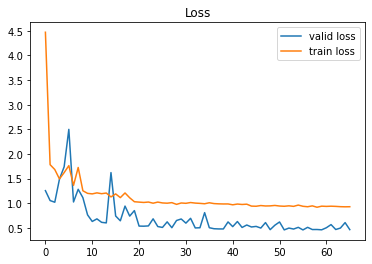

In [18]:
plt.title('Loss')
plt.plot(model.history.history['val_loss'],label='valid loss')
plt.plot(model.history.history['loss'],label='train loss')
plt.legend()
plt.show()

#plt.savefig('DNN_fig01.png',format='png',dpi=300)

In [19]:
model.load_weights('model.h5')

pred = model.predict(x_test)

result = pd.DataFrame(index=test.index[48:])
result.reset_index(inplace=True)

result['pred'] = pred
result['y'] = y_test

result.drop('index',axis=1,inplace=True)

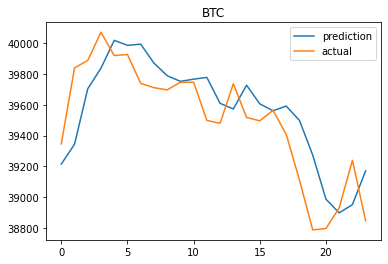

In [20]:
plt.title('BTC')
plt.plot(result.pred,label='prediction')
plt.plot(result.y,label='actual')
plt.legend()
plt.show()

#plt.savefig('DNN_fig02.png',format='png',dpi=300)

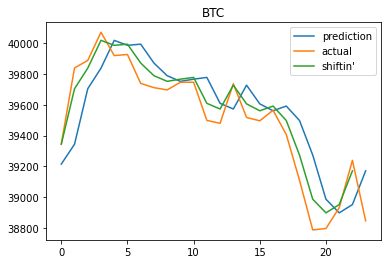

In [21]:
plt.title('BTC')
plt.plot(result.pred,label='prediction')
plt.plot(result.y,label='actual')

shift = result.pred.shift(-1).values
plt.plot(shift,label="shiftin'")

plt.legend()
plt.show()

#plt.savefig('DNN_fig03.png',format='png',dpi=300)

In [22]:
# RMSE

from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(y_test, pred) 
RMSE = np.sqrt(MSE)
round(RMSE,2)

231.23

In [23]:
# MAPE

def MAPE(y_test, pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100 
    
round(MAPE(y_test, pred)*100,2)

47.76

# S&P500

In [2]:
import yfinance as yf
import datetime

In [3]:
tickers = ['^GSPC', '^IXIC','^KS200', '^N225', '^GDAXI']

hourly_signal = {}
daily_signal = {}

for ticker in tickers:

    net = yf.Ticker(ticker)

    now = datetime.datetime.now()
    substract_days = datetime.timedelta(days=500)
    n_days_ago = now - substract_days    
    pred_start = pd.to_datetime(n_days_ago)
    pred_end = pd.to_datetime(now)

    start_date, end_date = pred_start, pred_end
    daily_signals_df = net.history(start=start_date, end=end_date, interval='1d', back_adjust=True, auto_adjust=True, prepost=False)
    hourly_signals_df = net.history(start=start_date, end=end_date, interval='1h', back_adjust=True, auto_adjust=True, prepost=True)
    
    daily_signal[ticker] = daily_signals_df['Close']
    hourly_signal[ticker] = hourly_signals_df['Close']

In [4]:
def get_df (name = '^GSPC'):
    df = pd.DataFrame(hourly_signal[name])
    df.columns = ['Close']
    df = df.dropna()
    return df

tickers = ['^GSPC', '^IXIC','^KS200', '^N225', '^GDAXI']

df_list = []
for ticker in tickers:
    df = get_df(ticker)
    df_list.append(df)

SP500 = df_list[0]
NASDAQ = df_list[1]
KS200 = df_list[2]
NI = df_list[3]
DAX = df_list[4]

SP500

,Close
2021-01-11 09:30:00-05:00,3808.939941
2021-01-11 10:30:00-05:00,3811.350098
2021-01-11 11:30:00-05:00,3811.800049
2021-01-11 12:30:00-05:00,3810.030029
2021-01-11 13:30:00-05:00,3799.010010
...,...
2022-05-25 13:30:00-04:00,3973.350098
2022-05-25 14:30:00-04:00,3990.260010
2022-05-25 15:30:00-04:00,3978.500000
2022-05-25 16:00:00-04:00,3978.730000


In [5]:
IDX_list = [SP500, NASDAQ, KS200, NI, DAX]
name_list = ['SP500', 'NASDAQ', 'KS200', 'NI', 'DAX']

for idx, name in zip (IDX_list, name_list):
    print(name +' : ' + str(idx.shape))

SP500 : (3066, 1)
NASDAQ : (3121, 1)
KS200 : (2359, 1)
NI : (2004, 1)
DAX : (3508, 1)


In [6]:
SP500_cp=SP500.copy()
SP500_cp.index.name="Date"

df=SP500_cp
df=df[(pd.DatetimeIndex(df.index)<'2022-05-25')&(pd.DatetimeIndex(df.index)>'2021-01-10')&(pd.DatetimeIndex(df.index).hour<17)]
df

,Close
Date,
2021-01-11 09:30:00-05:00,3808.939941
2021-01-11 10:30:00-05:00,3811.350098
2021-01-11 11:30:00-05:00,3811.800049
2021-01-11 12:30:00-05:00,3810.030029
2021-01-11 13:30:00-05:00,3799.010010
...,...
2022-05-24 12:30:00-04:00,3904.800049
2022-05-24 13:30:00-04:00,3925.340088
2022-05-24 14:30:00-04:00,3931.239990


In [7]:
train = df.iloc[:-24]
test = df.iloc[-24:]
print(train.shape,test.shape)

(2741, 1) (24, 1)


In [8]:
x_train = train[:-8]
y_train = train[8:]
print(x_train.shape,y_train.shape)

(2733, 1) (2733, 1)


In [9]:
x_test = test[:-8]
y_test = test[8:]
print(x_test.shape,y_test.shape)

(16, 1) (16, 1)


In [10]:
def windowDataset(data,label,window_size=8):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label.iloc[i]))
    return np.array(feature_list), np.array(label_list)

In [11]:
x_train,y_train = windowDataset(x_train,y_train)
print(x_train.shape,y_train.shape)

(2725, 8, 1) (2725, 1)


In [12]:
x_test,y_test = windowDataset(x_test,y_test)
print(x_test.shape,y_test.shape)

(8, 8, 1) (8, 1)


In [13]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1])
x_train.shape

(2725, 8)

In [14]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1])

In [15]:
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action='ignore')

In [16]:
model = keras.models.Sequential([
    Dense(256,activation='swish',kernel_initializer='random_normal'),
    Dense(128,activation='swish'),
    Dense(64,activation='swish'),
    Dense(32,activation='swish'),
    Dense(16,activation='swish'),
    Dense(1)
])

In [17]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train,y_train,test_size=0.1,shuffle=False)

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adamax(lr=1e-3),
    loss=tf.keras.losses.MeanAbsolutePercentageError(), 
    metrics=['mae']
)
callback = ModelCheckpoint('model.h5')
earlystopping = EarlyStopping(patience=10,verbose=1)
scheduler = ReduceLROnPlateau(patience=5,factor=0.5,cooldown=0,min_lr=1e-4)

In [19]:
history = model.fit(X_train,Y_train,batch_size=5,epochs=500,
              validation_data=(X_valid,Y_valid),callbacks=[callback,earlystopping,scheduler])

Epoch 1/500
491/491 [==============================] - 2s 3ms/step - loss: 3.8392 - mae: 165.2548 - val_loss: 1.2949 - val_mae: 54.9102 - lr: 0.0010
Epoch 2/500
491/491 [==============================] - 1s 2ms/step - loss: 1.2492 - mae: 54.0402 - val_loss: 1.2146 - val_mae: 52.0699 - lr: 0.0010
Epoch 3/500
491/491 [==============================] - 1s 2ms/step - loss: 1.0808 - mae: 46.7105 - val_loss: 0.8729 - val_mae: 37.1619 - lr: 0.0010
Epoch 4/500
491/491 [==============================] - 1s 2ms/step - loss: 1.0789 - mae: 46.6789 - val_loss: 1.0663 - val_mae: 45.6588 - lr: 0.0010
Epoch 5/500
491/491 [==============================] - 1s 3ms/step - loss: 1.0392 - mae: 44.8491 - val_loss: 0.7772 - val_mae: 32.7884 - lr: 0.0010
Epoch 6/500
491/491 [==============================] - 1s 2ms/step - loss: 1.0363 - mae: 44.7514 - val_loss: 1.4006 - val_mae: 59.4581 - lr: 0.0010
Epoch 7/500
491/491 [==============================] - 1s 2ms/step - loss: 1.2561 - mae: 54.2177 - val_loss: 2.

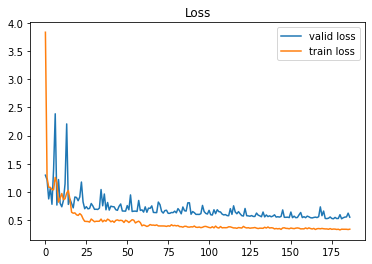

In [20]:
plt.title('Loss')
plt.plot(model.history.history['val_loss'],label='valid loss')
plt.plot(model.history.history['loss'],label='train loss')
plt.legend()
plt.show()

#plt.savefig('DNN_fig04.png',format='png',dpi=300)

In [22]:
model.load_weights('model.h5')

pred = model.predict(x_test)

result = pd.DataFrame(index=test.index[16:])
result.reset_index(inplace=True)

result['pred'] = pred
result['y'] = y_test

#result.drop('index',axis=1,inplace=True)

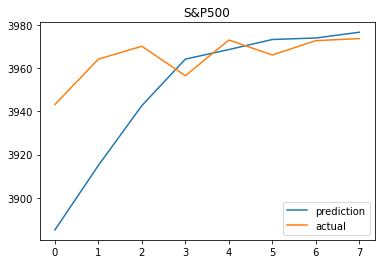

In [28]:
plt.title('S&P500')
plt.plot(result.pred,label='prediction')
plt.plot(result.y,label='actual')
plt.legend()
plt.show()

#plt.savefig('DNN_fig05.png',format='png',dpi=300)

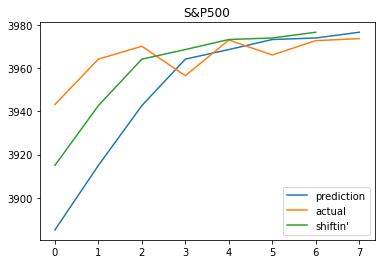

In [27]:
plt.title('S&P500')
plt.plot(result.pred,label='prediction')
plt.plot(result.y,label='actual')

shift = result.pred.shift(-1).values
plt.plot(shift,label="shiftin'")

plt.legend()
plt.show()

#plt.savefig('DNN_fig06.png',format='png',dpi=300)

In [25]:
# RMSE

from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(y_test, pred) 
RMSE = np.sqrt(MSE)
round(RMSE,2)

28.94

In [26]:
# MAPE

def MAPE(y_test, pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100 
    
round(MAPE(y_test, pred)*100,2)

50.01